### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [40]:
ratings = pd.read_csv("Data.csv")
genre = pd.read_csv("item.csv")
users = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

### <span style="color:#00b3e5;">Ratings</span> 

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
ratings.shape

(100000, 4)

In [5]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [6]:
ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

### <span style="color:#00b3e5;">Genre</span> 

In [41]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [8]:
genre.shape

(1681, 22)

In [9]:
genre.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [10]:
genre.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

### <span style="color:#00b3e5;">Users</span> 

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [12]:
users.shape

(943, 5)

In [13]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [14]:
users.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [15]:
# use sum on the default axis
genre[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

In [16]:
#hint: use sum on the axis = 1
multigenre = genre.set_index('movie title')
multigenre.drop('movie id', axis=1, inplace=True)
multigenre.drop('release date', axis=1, inplace=True)
multicol = multigenre.T.columns

In [17]:
multigenre.T[multicol].sum()

movie title
Toy Story                              3
GoldenEye                              3
Four Rooms                             1
Get Shorty                             3
Copycat                                3
                                      ..
B. Monkey                              2
Sliding Doors                          2
Sliding Doors                          2
You So Crazy                           1
Scream of Stone (Schrei aus Stein)     1
Length: 1729, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [18]:
genre[genre['unknown']==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
genre.drop(1371)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [20]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [21]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


<AxesSubplot:xlabel='age'>

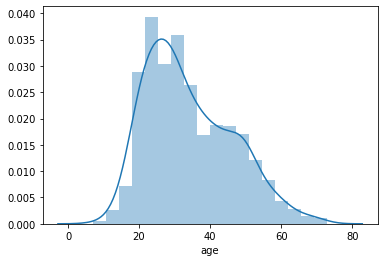

In [22]:
#your answers here
sns.distplot(users['age'])

<AxesSubplot:xlabel='gender', ylabel='count'>

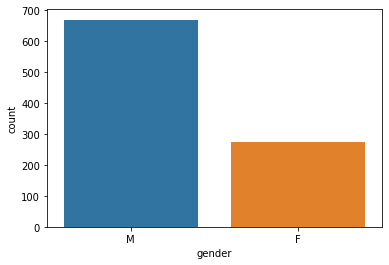

In [23]:
sns.countplot(users['gender'])

<AxesSubplot:xlabel='rating', ylabel='count'>

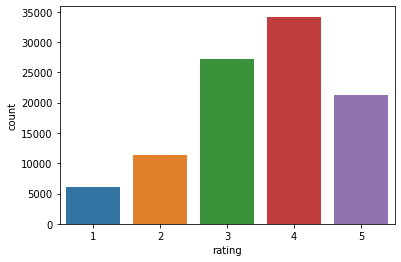

In [24]:
sns.countplot(ratings['rating'])

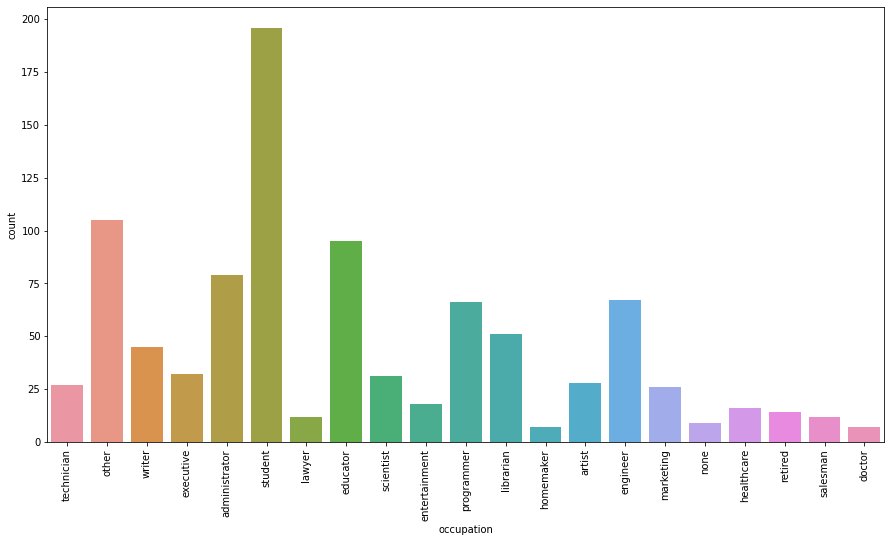

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(users['occupation'])
plt.xticks(rotation=90)
plt.show()

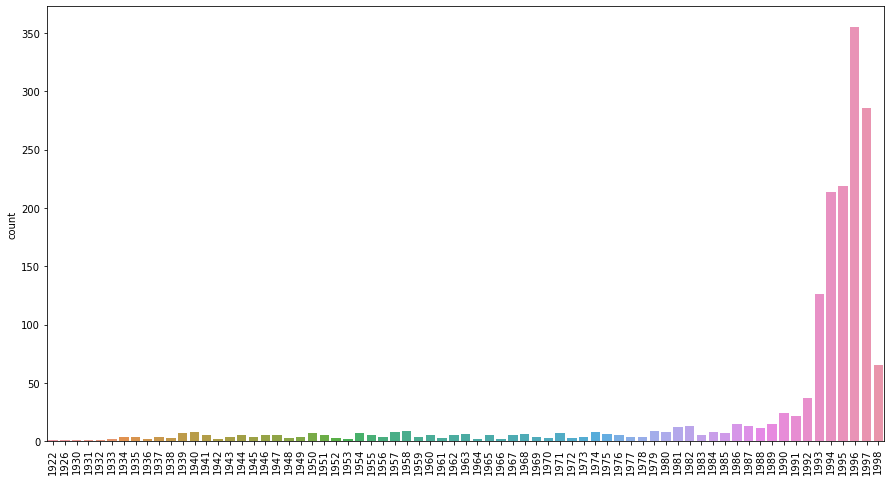

In [26]:
year = genre['release date']
arr1 = []
for x in year:
    a = (x.split('-')[2])
    arr1.append(a)
    
plt.figure(figsize=(15,8))      
sns.countplot(arr1)
plt.xticks(rotation=90)
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [27]:
#Your answer here
popular = genre
popular['year'] = arr1
popular.set_index('year',inplace=True)
popular.drop('movie id', axis=1, inplace=True)
popular.drop('movie title', axis=1, inplace=True)
popular.drop('release date', axis=1, inplace=True)

In [28]:
grouped = popular.groupby('year')
grouped = grouped.sum()
grouped = grouped.T
grouped

year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


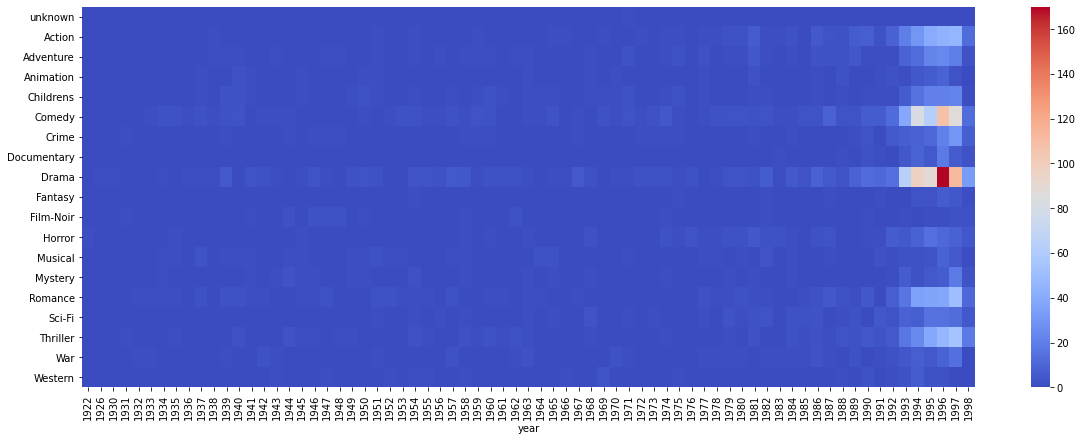

In [29]:
fig,ax = plt.subplots(figsize=(20, 7))  
sns.heatmap(grouped, cmap="coolwarm")
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [30]:
#your answer here
grouped_ratings = ratings.groupby('movie id')['rating'].count() > 100
grouped_ratings

movie id
1        True
2        True
3       False
4        True
5       False
        ...  
1678    False
1679    False
1680    False
1681    False
1682    False
Name: rating, Length: 1682, dtype: bool

In [31]:
ratings['rating'].isin(grouped_ratings)

0        False
1        False
2         True
3        False
4         True
         ...  
99995    False
99996    False
99997     True
99998    False
99999    False
Name: rating, Length: 100000, dtype: bool

In [32]:
df1 = pd.merge(ratings, grouped_ratings, how='inner', on='movie id')
df1

,user id,movie id,rating_x,timestamp,rating_y
0,196,242,3,881250949,True
1,63,242,3,875747190,True
2,226,242,5,883888671,True
3,154,242,3,879138235,True
4,306,242,5,876503793,True
...,...,...,...,...,...
99995,840,1674,4,891211682,False
99996,655,1640,3,888474646,False
99997,655,1637,3,888984255,False
99998,655,1630,3,887428735,False


In [33]:
df1.sort_values('rating_y', axis=0, ascending=False, inplace=False, ignore_index=True)

,user id,movie id,rating_x,timestamp,rating_y
0,196,242,3,881250949,True
1,70,211,3,884149646,True
2,138,211,4,879024183,True
3,271,211,5,885849164,True
4,6,211,5,883601155,True
...,...,...,...,...,...
99995,877,463,4,882677311,False
99996,846,463,5,883948222,False
99997,840,463,5,891205287,False
99998,894,463,4,882404430,False


In [39]:
genre

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [43]:
df2 = pd.merge(df1, genre, how='outer', on='movie id')
df3 = df2.groupby('movie id')
df3 = df2[df2['rating_y'] == True][['movie id', 'rating_y', 'movie title']]
df4 = df3.groupby('movie id')
df4
#df4[['movie id', 'movie title', 'rating_y']].head(25)

In [44]:
for movie_id, frame in df4:
    print(f"First entry for {movie_id!r}")
    print("------------------------")
    print(frame.head(1), end="\n\n")

First entry for 1
------------------------
      movie id  rating_y movie title
3397         1      True  Toy Story 

First entry for 2
------------------------
       movie id  rating_y movie title
23665         2      True  GoldenEye 

First entry for 4
------------------------
      movie id  rating_y  movie title
6855         4      True  Get Shorty 

First entry for 7
------------------------
       movie id  rating_y      movie title
32358         7      True  Twelve Monkeys 

First entry for 8
------------------------
       movie id  rating_y movie title
54675         8      True       Babe 

First entry for 9
------------------------
       movie id  rating_y        movie title
65119         9      True  Dead Man Walking 

First entry for 11
------------------------
       movie id  rating_y     movie title
34932        11      True  Seven (Se7en) 

First entry for 12
------------------------
       movie id  rating_y           movie title
43580        12      True  Usual Susp

18578       195      True  Terminator, The 

First entry for 196
------------------------
      movie id  rating_y          movie title
8614       196      True  Dead Poets Society 

First entry for 197
------------------------
       movie id  rating_y     movie title
40502       197      True  Graduate, The 

First entry for 198
------------------------
       movie id  rating_y                movie title
35779       198      True  Nikita (La Femme Nikita) 

First entry for 199
------------------------
       movie id  rating_y                     movie title
40960       199      True  Bridge on the River Kwai, The 

First entry for 200
------------------------
       movie id  rating_y    movie title
18879       200      True  Shining, The 

First entry for 202
------------------------
       movie id  rating_y     movie title
28224       202      True  Groundhog Day 

First entry for 203
------------------------
       movie id  rating_y  movie title
65667       203      True  Unfo

19085       385      True  True Lies 

First entry for 393
------------------------
       movie id  rating_y      movie title
67442       393      True  Mrs. Doubtfire 

First entry for 402
------------------------
       movie id  rating_y movie title
43166       402      True      Ghost 

First entry for 403
------------------------
       movie id  rating_y movie title
12935       403      True     Batman 

First entry for 404
------------------------
       movie id  rating_y movie title
49058       404      True  Pinocchio 

First entry for 405
------------------------
       movie id  rating_y           movie title
21589       405      True  Mission: Impossible 

First entry for 408
------------------------
       movie id  rating_y      movie title
28504       408      True  Close Shave, A 

First entry for 410
------------------------
       movie id  rating_y movie title
39883       410      True    Kingpin 

First entry for 411
------------------------
       movie id  ratin

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



#### <span style="color:#00b3e5;">Write your answers here</span> 
* Men watch more drama than women: True, 72% of users watching drama are men
* Women watch more Sci-Fi than men: False, Only 21% of users watching Sci-Fi are women
* Men watch more Romance than women: True, 70% of users who watch Romance are men

In [45]:
user_rating = pd.merge(users, ratings, how='outer', on='user id')
all_merge = pd.merge(user_rating, genre, how='outer', on='movie id')

In [46]:
groupbygender = all_merge.groupby('gender')[['rating', 'Drama', 'Sci-Fi', 'Romance']].sum()
groupbygender

,rating,Drama,Sci-Fi,Romance
gender,,,,
F,90901,11008.0,2629.0,5858.0
M,262085,28887.0,10101.0,13603.0
